# 智能农场物联网数据监控

功能：

- 实时监视多个项目的数据；
- 针对其中某个数据进行实时绘图。

In [1]:
import siot,time

SERVER = "192.168.3.122"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码
project_list  = ['af01','af02','af88']   #“topic”为“项目名称/设备名称”
topic_list= ['a0','d4','a1'] # 设备名称

msg_map={} # 存储接收到的数据

# 收到消息后存入字典，记录时间
def on_subscribe(client,userdata,msg):
    global msg_map
    print("\nTopic:" + str(msg.topic) + " Message:" + str(msg.payload))
    msg_map[str(msg.topic)]=[str(msg.payload.decode()),time.time()]

# 读取后不删除
def topic_read(topic):
    global msg_map
    result=msg_map.get(topic,None)
    if result:
        re = result[0]
    return re
def topic_read_time(topic):
    global msg_map
    result=msg_map.get(topic,None)
    if result:
        re = time.asctime(time.localtime(result[1]))
    return re

siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord)
siot.connect()
for item1 in project_list:
    for item2 in topic_list:
        siot.subscribe(item1 +'/'+ item2, on_subscribe)
siot.loop()



连接结果: 连接成功 

Topic:af88/a0 Message:b'225'

Topic:af88/a1 Message:b'189'


In [2]:
# 读取某条消息的接收时间
print(topic_read_time('af88/a0'))

Thu Mar 18 20:37:55 2021

Topic:af88/a0 Message:b'226'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'229'

Topic:af88/a1 Message:b'48'

Topic:af88/a0 Message:b'220'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'217'

Topic:af88/a1 Message:b'50'

Topic:af88/a0 Message:b'223'

Topic:af88/a1 Message:b'50'

Topic:af88/a0 Message:b'222'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'227'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'221'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'226'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'226'

Topic:af88/a1 Message:b'50'

Topic:af88/a0 Message:b'228'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'223'

Topic:af88/a1 Message:b'50'

Topic:af88/a0 Message:b'219'

Topic:af88/a1 Message:b'51'

Topic:af88/a0 Message:b'224'

Topic:af88/a1 Message:b'50'

Topic:af88/a0 Message:b'223'

Topic:af88/a1 Message:b'51'


## 选择其中某个数据进行绘图

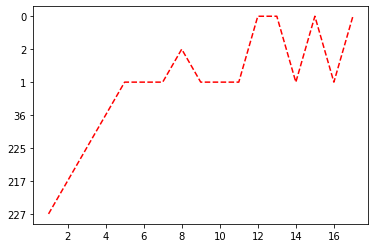

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
x,p1=[],[]
i=0
w=20 #设置数据的长度
def draw(v1):
    global x,i,p1
    i=i+1
    x.append(i)
    p1.append(v1)
    # 当数据太多了开始删除，避免图表越来越小
    if len(x)>w:
        x.pop(0)
        p1.pop(0)
    fig = plt.figure()
    plt.plot(x,p1,'r--')
    display.clear_output(wait=True)
    plt.show()

topicid = 'af88/a0'
oldtime=topic_read_time(topicid)
draw(topic_read(topicid))

while True:
    newtime=topic_read_time(topicid)
    if oldtime!=newtime:
        draw(topic_read(topicid))
        oldtime=newtime